In [1]:
import os
import random
from swmm5.swmm5tools import SWMM5Simulation

In [2]:
def write_file(template, v1, v2, outf):
    """ Replaces the string in template with str(v1) and str(v2) 
    and writes the resulting string to the file name outf"""
    output=template.replace("#$1",str(v1)).replace("#$2",str(v2))
    with open (outf, "w") as fp:
        fp.writelines(output)

def get_results(template, v1, v2, outf ):
    """ calls write_file with template, v1 and v2, runs resulting input file
    in swmm and returns the maximum flow value of that simulation."""    
    write_file(template, v1, v2, outf)
    st=SWMM5Simulation(outf)
    r=max(st.Results('NODE','J7', 4))
    return r

def get_val(m1, std1, rangevalue):
    """ Returns a value from gaussian distribution with m1, std1, making 
    sure values are not drawn outside the rangevalue"""       
    while (True):
        v=random.gauss(m1,std1)
        #print(v)
        if(v<rangevalue[0] or v>rangevalue[1]):
            return get_val(m1,std1,rangevalue)
        return v

In [3]:
os.chdir("E:\\Presentations\\2016_python\\examples")
with open ("swmm5Example2.inp_", "r") as fp:
    template=fp.read()

In [4]:
m1=0.02
std1=.01
m2=0.03
std2=0.015
rangevalue=[0.005,0.05]

outf="swmm5Example_tmp.inp"
vals1=[]
vals2=[]
res=[]
for i in range(1000):
    v1 = get_val(m1, std1, rangevalue)
    v2 = get_val(m2,std2, rangevalue)
    vals1.append(v1)
    vals2.append(v2)
    r = get_results(template, v1, v2, outf)
    res.append(r)


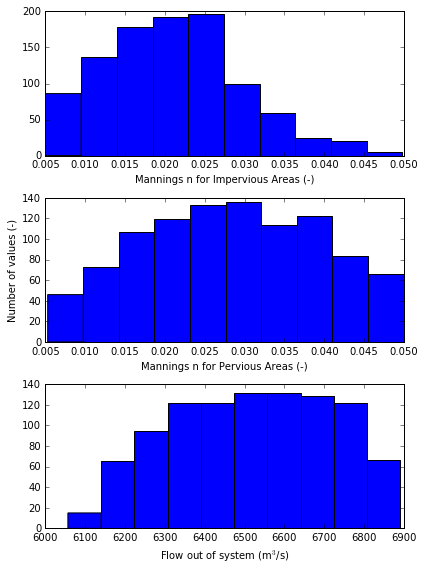

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(6, 8), dpi=80,)

#ax=fig.add_subplot(111)
ax1=fig.add_subplot(311)
ax1.hist(vals1)
ax1.set_xlabel("Mannings n for Impervious Areas (-)")
ax2=fig.add_subplot(312)
ax2.hist(vals2)
ax2.set_xlabel("Mannings n for Pervious Areas (-)")
ax2.set_ylabel("Number of values (-)")
ax3=fig.add_subplot(313)
ax3.hist(res)
ax3.set_xlabel("Flow out of system (m$^3$/s)")
#ax.set_ylabel("frequency (-)")
plt.tight_layout()
